# Preparing the Data for ML Modeling

Import the necessary libraries

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Import the Data

In [2]:
df = pd.read_excel("Data/Visualization_Data.xlsx")

Creating a representative sample

In [3]:

"""
This code evaluates the maximum percentage of a given dataframe that can be sampled 
while ensuring the sample is representative of the population distributions specified 
for two categorical variables: 'Uni_Year' and 'Study_Stream'. The representativeness 
is assessed using chi-squared goodness of fit tests. Sampling is done without replacement 
starting from 99% of the dataframe and reduced by 1% increments until the sample 
to represent the population (p-value > 0.05 for both variables).
"""


# Define the population data
data_uni_year = pd.DataFrame({
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Counts': [680, 643, 552, 387]
})

data_study_stream = pd.DataFrame({
    'Study_Stream': [
        'Physical Science',
        'Biological Science',
        'Industrial Statistics and Mathematical Finance',
        'Biochemistry & Molecular Biology'
    ],
    'Counts': [1099, 558, 379, 215]
})

def test_representativeness(df, population, variable):
    """
    Perform a chi-squared goodness of fit test to compare the observed frequency distribution
    of a categorical variable in a sample DataFrame against the expected frequency distribution
    based on a given population DataFrame.

    Parameters:
    - df (DataFrame): Sample DataFrame containing the observed frequencies of the categorical variable.
    - population (DataFrame): Population DataFrame with the expected counts of the categorical variable.
    - variable (str): The name of the categorical variable to test.

    Returns:
    - float: The p-value from the chi-squared test, indicating if the observed distribution significantly
             differs from the population distribution (p <= 0.05 indicates a significant difference).
    """
    # Calculate observed frequencies from the sample
    observed = df[variable].value_counts().sort_index()
    
    # Align the population data and calculate expected frequencies
    expected = population.set_index(variable)['Counts']
    total_population = expected.sum()
    total_sample = observed.sum()
    
    # Adjust expected frequencies to match the sample size
    expected = expected * (total_sample / total_population)
    expected = expected.reindex(observed.index, fill_value=0)  # Ensure the indices match
    
    # Perform the chi-squared test
    chi2, p_value = chisquare(f_obs=observed, f_exp=expected)
    
    return p_value


# Sampling and testing loop
max_representative_sample = 0
for percentage in range(99, 75, -1):
    sample_df = df.sample(frac=percentage/100, replace=False, weights='Post_Stratification_Weight',random_state=42)
    p_uni_year = test_representativeness(sample_df, data_uni_year, 'Uni_Year')
    p_study_stream = test_representativeness(sample_df, data_study_stream, 'Study_Stream')
    
    if p_uni_year > 0.05 and p_study_stream > 0.05:
        max_representative_sample = percentage
        break

print(f"Maximum percentage of the dataframe that can be sampled while being representative: {max_representative_sample}%")


Maximum percentage of the dataframe that can be sampled while being representative: 82%


Extracting the data

In [4]:
df = df.sample(frac=82/100, replace=False, weights='Post_Stratification_Weight',random_state=42)
df.reset_index(drop=True)

,Sex,Ethnicity,Religion,Job_Type,Parents_Employment,Family_Income,Sleep_Hours,Residence_Type,Accommodation_Satisfaction,Socializing_Frequency,...,Economic_Impact,Job_Loss_Family,Currently_Single,Love_Affair_Satisfied,Never_Love,Love_Affair_Not_Satisfied,Separated,depression_status,Post_Stratification_Weight,Weight_Status
0,Male,Sinhala,Buddhism,I am not employed,Only one of my parents are employed,"250,000-500,000",6.0,Home,5,More than once a week,...,3,No,Yes,No,No,No,No,No MDD,1.151488,Healthy Weight
1,Female,Sinhala,Buddhism,I am not employed,Both my parents are employed,"30,000-100,000",6.0,Home,4,Once a month,...,4,No,No,No,Yes,No,No,No MDD,0.874905,Healthy Weight
2,Female,Sinhala,Buddhism,I am not employed,Only one of my parents are employed,"30,000-100,000",7.0,Home,3,Less than once a month,...,5,No,No,Yes,No,No,No,No MDD,1.079520,Healthy Weight
3,Female,Sinhala,Christianity / Catholicism,I am not employed,Only one of my parents are employed,"100,00-250,000",7.0,Other,4,Less than once a month,...,5,No,No,No,Yes,No,No,MDD,1.079520,Underweight
4,Female,Sinhala,Buddhism,I do a part time job,Both my parents are employed,"100,00-250,000",6.0,Rented Place,5,Once a week,...,4,No,Yes,No,No,No,No,MDD,1.079520,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Male,Sinhala,Buddhism,I do a full time job,Both my parents are employed,"100,00-250,000",5.0,Rented Place,2,2 to 3 times a month,...,4,No,Yes,No,No,No,No,No MDD,0.462825,Healthy Weight
291,Male,Sinhala,Other,I am not employed,Only one of my parents are employed,"30,000-100,000",6.0,Home,5,2 to 3 times a month,...,3,No,No,No,Yes,No,No,No MDD,1.079520,Healthy Weight
292,Female,Sinhala,Buddhism,I am not employed,Neither of my parents are employed,"Less than 30,000",8.0,Other,3,Less than once a month,...,4,No,No,No,Yes,No,No,MDD,0.489782,Underweight
293,Male,Sinhala,Buddhism,I am not employed,Only one of my parents are employed,"30,000-100,000",7.0,Home,4,Less than once a month,...,3,No,Yes,No,Yes,No,No,No MDD,1.079520,Healthy Weight


Discarding the useless variables

In [5]:
# Columns to be removed
columns_to_remove = [
    "Ethnicity", "Currently_Single", "Exercise_Days", "Family_Income", "Family_Interaction", 
    "Family_Visit_Frequency", "Job_Type", "Lecture_Preferance", "Life_Threats", "Living_Parents", 
    "Love_Affair_Not_Satisfied", "Parents_Employment", "Religion", "Residence_Type", "Sleep_Hours", 
    "Sports_Participation", "Uni_Entry_Attempt", "Smoke_Frequency", "Travel_Mode"
]

# Remove specified columns
df = df.drop(columns=columns_to_remove)

### Encoding the ordinal categorical variables

In [6]:
"""
Accomodation Satisfaction takes on the values 1,2,3,4,5. However, it is more discriminative in predicting 
depression if 1,2 were combined and 4,5 was combined.
"""

# Define a mapping function for Accommodation_Satisfaction
def map_accommodation_satisfaction(value):
    if value in [1, 2]:
        return 1
    elif value == 3:
        return 2
    elif value in [4, 5]:
        return 3

# Apply the mapping function to the Accommodation_Satisfaction column
df['Accommodation_Satisfaction'] = df['Accommodation_Satisfaction'].apply(map_accommodation_satisfaction)


In [7]:
"""

The frequency of socializing takes on the values Less than once a month,
Once a month, 2 to 3 times a month, Once a week, More than once a week.
However, it is more discriminative in predicting 
depression if Less than once a month, Once a month were combined
and Once a week, More than once a week was combined.

"""

# Mapping dictionary for Socializing_Frequency
socializing_map = {
    'Less than once a month': 1,
    'Once a month': 1,
    '2 to 3 times a month': 2,
    'Once a week': 3,
    'More than once a week': 3
}

# Apply the mapping to the Socializing_Frequency column
df['Socializing_Frequency'] = df['Socializing_Frequency'].map(socializing_map)

In [8]:
"""

The frequency of socializing takes on the values Eat 3 meals a day but not necessarily a healthy diet,
Nutritionally Balanced Diet, Unable to eat 3 meals a day, Mostly eating junk food, 
On a diet. However, it is more discriminative in predicting 
depression if Unable to eat 3 meals a day, Mostly eating junk food were combined (As they are unhealthy)
and the rest of the categories were ordinally encoded from the least healthiest category to the most
healthiest category.

"""

# Mapping dictionary for Meal_Type
meal_type_map = {
    'Eat 3 meals a day but not necessarily a healthy diet': 2,
    'Nutritionally Balanced Diet': 4,
    'Unable to eat 3 meals a day': 1,
    'Mostly eating junk food': 1,
    'On a diet': 3
}

# Apply the mapping to the Meal_Type column
df['Meal_Type'] = df['Meal_Type'].map(meal_type_map)

In [9]:
# Mapping dictionary for Alcohol_Frequency
alcohol_frequency_map = {
    'Never': 1,
    'Rarely': 2,
    'Occasionally': 3
}

# Apply the mapping to the Alcohol_Frequency column
df['Alcohol_Frequency'] = df['Alcohol_Frequency'].map(alcohol_frequency_map)


In [10]:
# Mapping dictionary for Travel_Time
travel_time_map = {
    'Less than 1 hour': 1,
    'Between 1 and 3 hours': 2,
    'Between 3 and 5 hours': 3
}

# Apply the mapping to the Travel_Time column
df['Travel_Time'] = df['Travel_Time'].map(travel_time_map)


In [11]:
# Mapping dictionary for Academic_Achievements_Satisfaction
academic_achievements_map = {
    'No': 1,
    'Neither satisfied nor dissatisfied': 2,
    'No GPA as of yet': 2,
    'Yes': 3
}

# Apply the mapping to the Academic_Achievements_Satisfaction column
df['Academic_Achievements_Satisfaction'] = df['Academic_Achievements_Satisfaction'].map(academic_achievements_map)

In [12]:
# Mapping dictionary for Weight_Status
weight_status_map = {
    'Underweight': 1,
    'Healthy Weight': 2,
    'Overweight': 3,
    'Obesity': 4
}

# Apply the mapping to the Weight_Status column
df['Weight_Status'] = df['Weight_Status'].map(weight_status_map)


### Encoding the nominal categorical variables

In [13]:
# List of nominal categorical variables
nominal_vars = [
    'Sex', 'Sexual_Orientation', 'Uni_Year', 'Study_Stream', 'Academic_Program_Satisfaction', 
    'Societies_Participation', 'English_Difficulty', 'Ragging_Experience', 'Staff_Support_Perception', 
    'Awareness_Of_Help', 'Siblings', 'Financial_Support', 'Financial_Support_Duty', 'Family_Debts', 
    'Recent_Death', 'Family_Illness', 'Power_Cut_Impact', 'Home_Confinement', 'Medical_Access_Difficulty', 
    'Job_Loss_Family', 'Love_Affair_Satisfied', 'Never_Love', 'Separated'
]

# Apply dummy encoding to these variables
df_encoded = pd.get_dummies(df, columns=nominal_vars, drop_first=True)

### Encoding the Dependent Variable

In [14]:
# Mapping dictionary for depression_status
depression_status_map = {
    'No MDD': 0,
    'MDD': 1
}

# Apply the mapping to the depression_status column
df_encoded['depression_status'] = df_encoded['depression_status'].map(depression_status_map)

Normalizing the Data

In [15]:
# Select all columns except 'depression_status' and the post stratification weight
features = df_encoded.drop(['depression_status', 'Post_Stratification_Weight'], axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features
# Ensure to include the 'depression_status' and 'Post_Stratification_Weight' back into the DataFrame
df_normalized = pd.DataFrame(normalized_features, columns=features.columns)
df_normalized['depression_status'] = df_encoded['depression_status'].values

Fixing the class imbalance

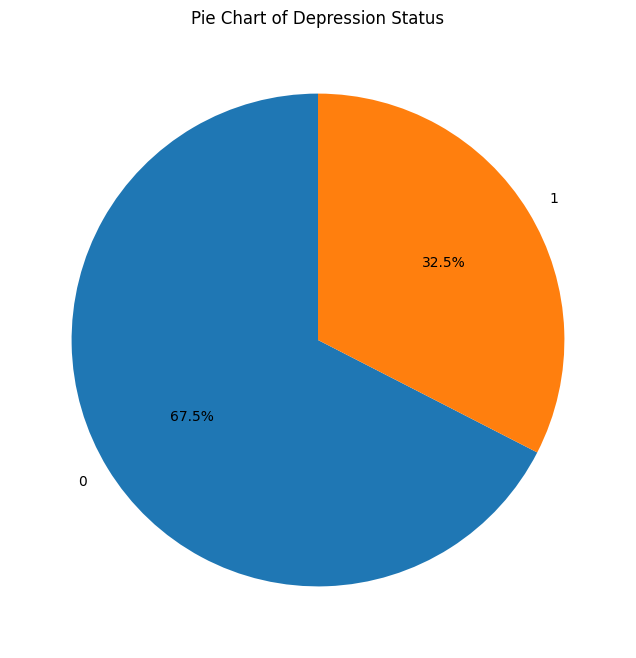

In [18]:
#Let us first check the percentage of those with depression in our Resampled Data

# Count the occurrences of each status in the 'depression_status' column
status_counts = df_normalized['depression_status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Depression Status')
plt.show()

In [21]:
# Now let us fix the issue of class imbalance

# Split your data into features and target
X = df_normalized.drop('depression_status', axis=1)  # Features
y = df_normalized['depression_status']  # Target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the full dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
new_data = pd.concat([X_smote, y_smote], axis=1)  # Combine features and target into a new DataFrame

print("Class distribution after SMOTE on full dataset:")
print(y_smote.value_counts())

Class distribution after SMOTE on full dataset:
depression_status
0    199
1    199
Name: count, dtype: int64


Saving the Data

In [23]:
new_data.to_excel("Data/ML_Data.xlsx")